# **PORTFOLIO OPTIMIZATION USING EFFICIENT FRONTIER ESTIMATION**

In [ ]:
!pip install quantstats
!pip install riskfolio-lib

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import quantstats as qs
import seaborn as sns
from pylab import mpl, plt
plt.style.use('seaborn')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
import statsmodels.api as sm
import math
import riskfolio as rp
import cvxpy as cp
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4%}'.format

In [ ]:
ASSETS = ["AAPL", "AMZN", "BRK-B", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
n_assets = len(ASSETS)

prices_df = yf.download(ASSETS, start = "2018-05-26", end = "2024-06-28")

prices_df.head()

[*********************100%%**********************]  8 of 8 completed


Price       Adj Close                                                \
Ticker           AAPL       AMZN       BRK-B       GOOG        META   
Date                                                                  
2018-05-29 4460.4061% 8064.3501% 18986.9995% 5295.5738% 18535.9100%   
2018-05-30 4450.9117% 8124.4499% 19410.0006% 5332.9311% 18728.5141%   
2018-05-31 4435.9562% 8148.1003% 19152.9999% 5418.7836% 19138.6719%   
2018-06-01 4515.9538% 8207.7003% 19222.9996% 5591.1373% 19359.2178%   
2018-06-04 4553.6980% 8326.3496% 19130.0003% 5689.9750% 19288.3636%   

Price                                           Close             ...  \
Ticker           MSFT      NVDA       TSLA       AAPL       AMZN  ...   
Date                                                              ...   
2018-05-29 9197.8134% 615.6151% 1891.7334% 4697.4998% 8064.3501%  ...   
2018-05-30 9286.0291% 626.5113% 1944.8000% 4687.5000% 8124.4499%  ...   
2018-05-31 9275.7027% 624.5302% 1898.2000% 4671.7499% 8148.1003%  ...   
2018-06-01 9458.7044% 637.9774% 1945.4666% 4756.0001% 8207.7003%  ...   
2018-06-04 9541.2849% 655.8818% 1978.2667% 4795.7500% 8326.3496%  ...   

Price           Open                Volume                               \
Ticker          NVDA       TSLA       AAPL      AMZN    BRK-B      GOOG   
Date                                                                      
2018-05-29 621.3750% 1856.7333%   90056400  76930000  8912100  37302000   
2018-05-30 624.8750% 1888.6000%   74762000  58148000  4307600  22770000   
2018-05-31 629.2500% 1914.7333%  109931200  63326000  5787500  61766000   
2018-06-01 635.0000% 1905.7333%   93770000  66268000  3817800  48432000   
2018-06-04 647.5000% 1962.2667%  105064800  63754000  4444500  37792000   

Price                                                 
Ticker          META      MSFT       NVDA       TSLA  
Date                                                  
2018-05-29  16398900  28671000  352684000   84999000  
2018-05-30  13736900  22158500  390996000  112345500  
2018-05-31  30782600  34140900  493868000   88795500  
2018-06-01  17307200  28655600  421968000   81366000  
2018-06-04  18939800  27281600  642024000   71967000  

[5 rows x 48 columns]

<Axes: xlabel='Date'>

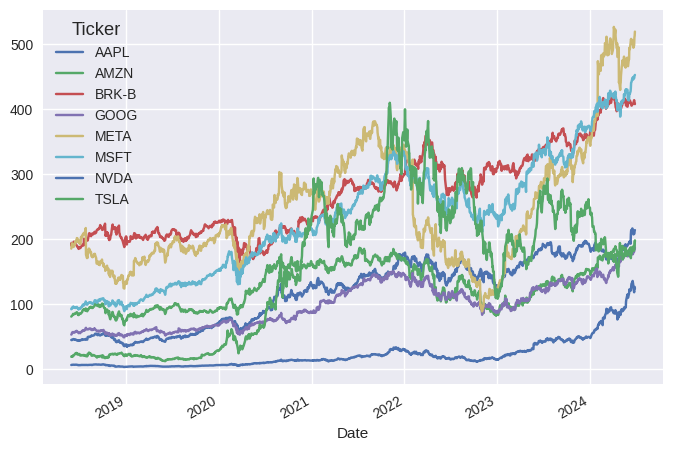

In [ ]:
prices_df["Adj Close"].plot()

In [ ]:
returns = prices_df["Adj Close"].pct_change().dropna()

In [ ]:
returns.head()

Ticker,AAPL,AMZN,BRK-B,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,,
2018-05-30,-0.2129%,0.7453%,2.2278%,0.7054%,1.0391%,0.9591%,1.7700%,2.8052%
2018-05-31,-0.3360%,0.2911%,-1.3241%,1.6099%,2.1900%,-0.1112%,-0.3162%,-2.3961%
2018-06-01,1.8034%,0.7315%,0.3655%,3.1807%,1.1524%,1.9729%,2.1532%,2.4901%
2018-06-04,0.8358%,1.4456%,-0.4838%,1.7678%,-0.3660%,0.8731%,2.8064%,1.6860%
2018-06-05,0.7715%,1.8664%,-0.2771%,0.0325%,-0.1759%,0.5115%,0.0831%,-1.8905%


<Axes: xlabel='Date'>

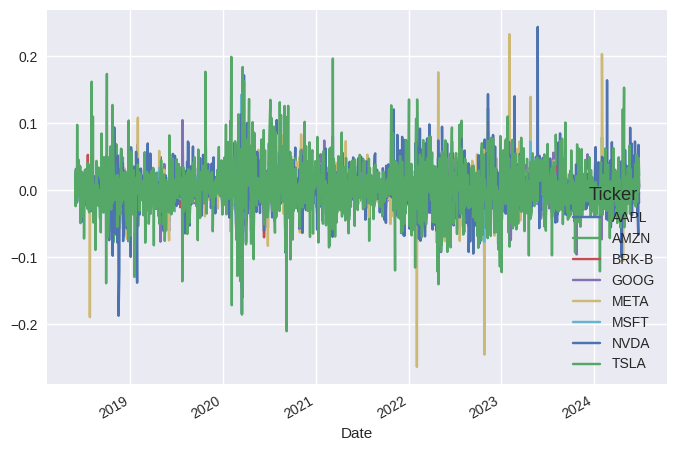

In [ ]:
returns.plot()

### **LOGARITHMIC RETURNS**



Text(0.5, 1.0, 'Daily Log Returns')

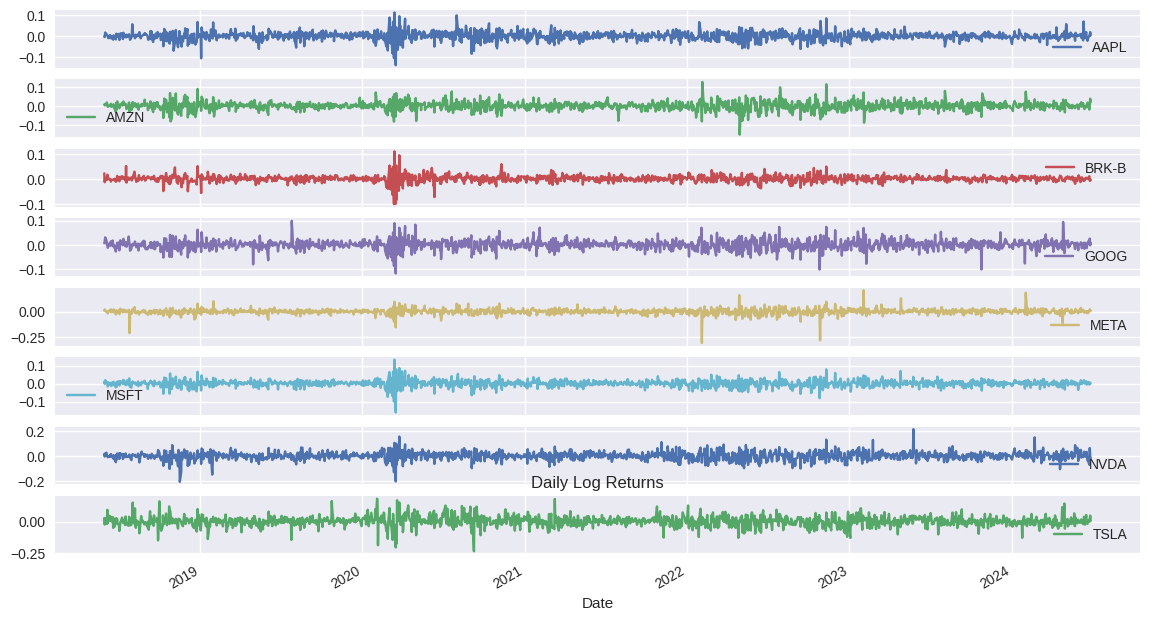

In [ ]:
log_returns = np.log(prices_df["Adj Close"]/prices_df["Adj Close"].shift(1)).dropna()
log_returns.plot(subplots = True, figsize = (14,8))
plt.title('Daily Log Returns')

LOG RETURNS DISTRIBUTION

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'BRK-B'}>],
       [<Axes: title={'center': 'GOOG'}>,
        <Axes: title={'center': 'META'}>,
        <Axes: title={'center': 'MSFT'}>],
       [<Axes: title={'center': 'NVDA'}>,
        <Axes: title={'center': 'TSLA'}>, <Axes: >]], dtype=object)

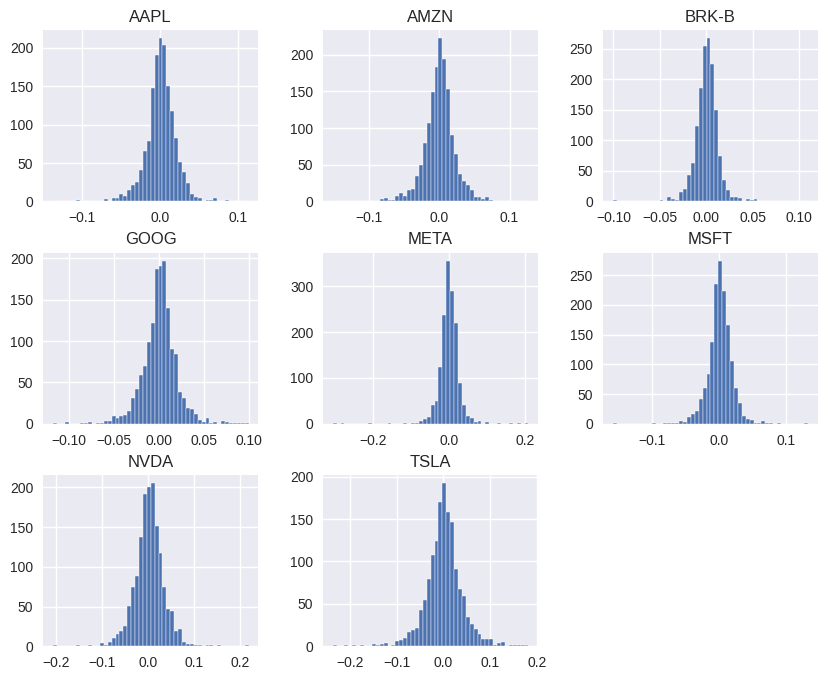

In [ ]:
log_returns.hist(bins= 50, figsize=(10,8))

Text(0, 0.5, 'sample quantiles')

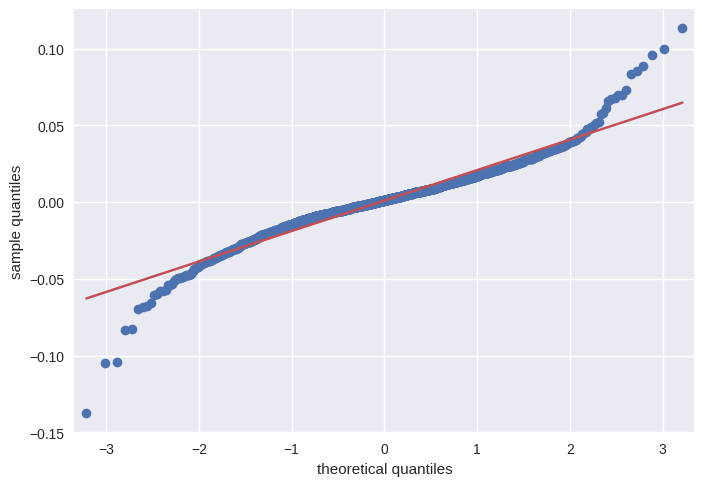

In [ ]:
sm.qqplot(log_returns['AAPL'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

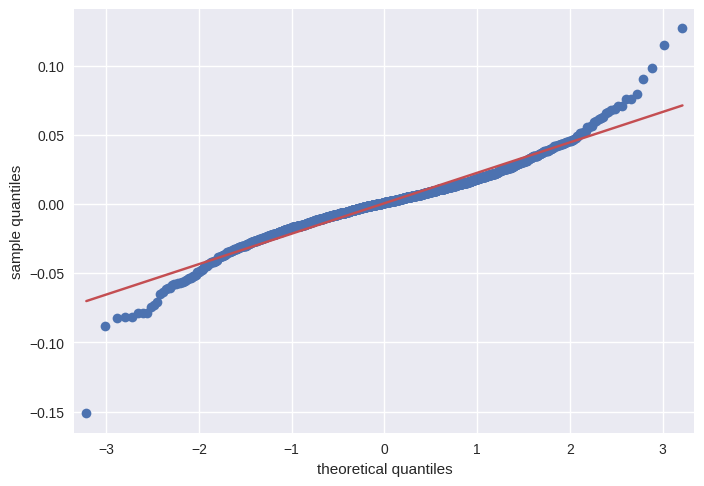

In [ ]:
sm.qqplot(log_returns['AMZN'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

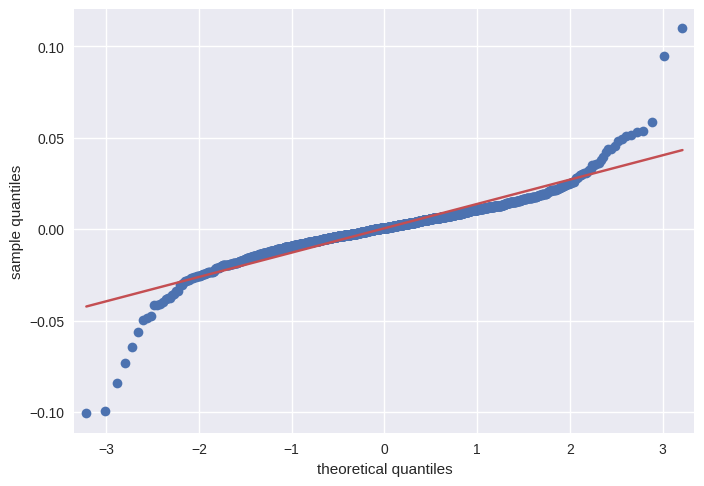

In [ ]:
sm.qqplot(log_returns['BRK-B'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

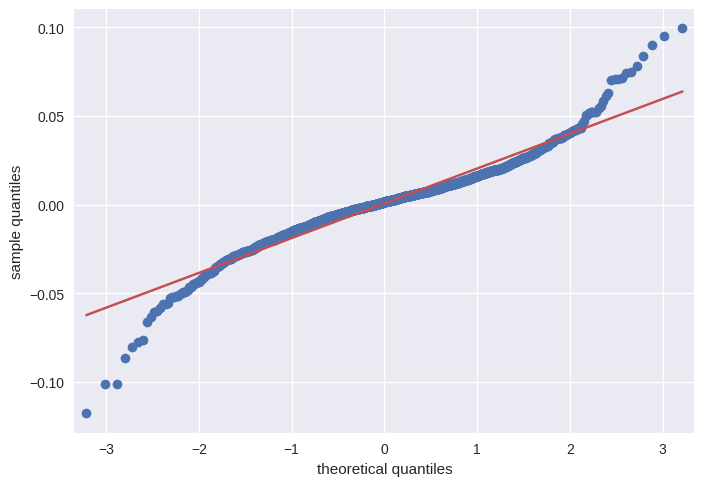

In [ ]:
sm.qqplot(log_returns['GOOG'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

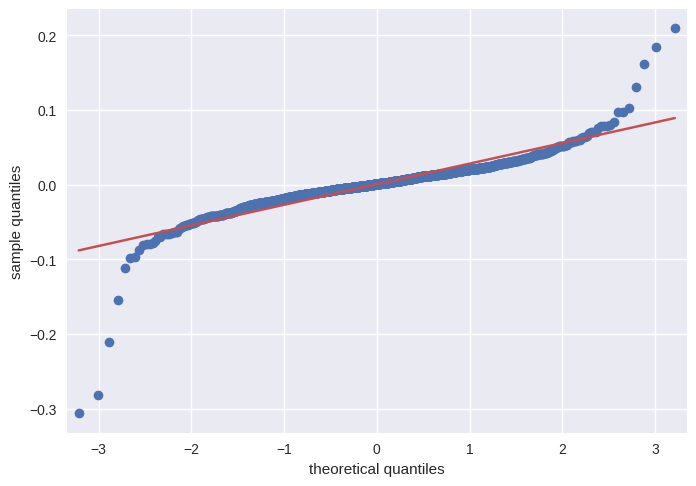

In [ ]:
sm.qqplot(log_returns['META'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

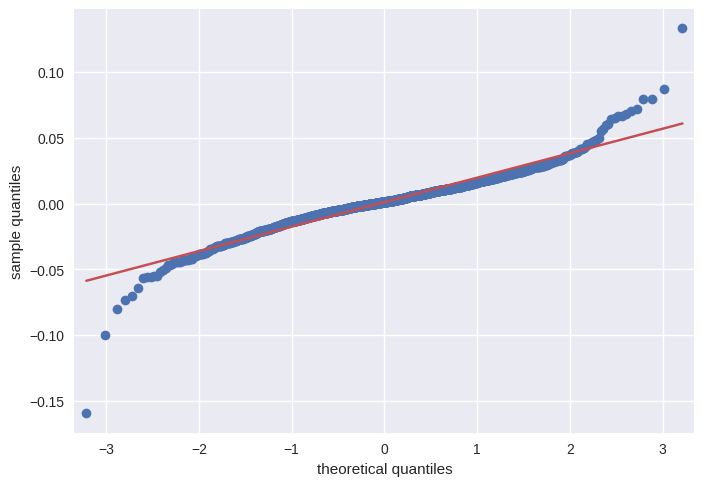

In [ ]:
sm.qqplot(log_returns['MSFT'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

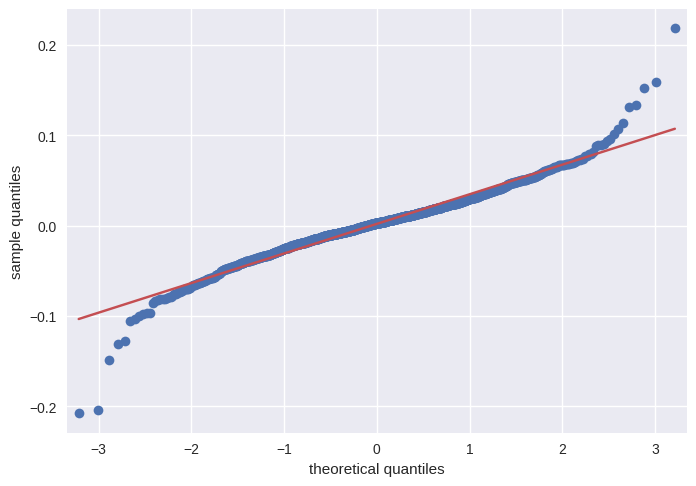

In [ ]:
sm.qqplot(log_returns['NVDA'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

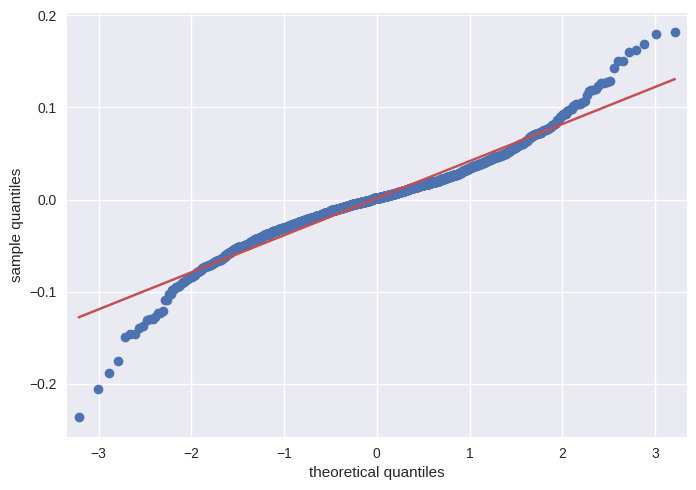

In [ ]:
sm.qqplot(log_returns['TSLA'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

MATRICES

In [ ]:
log_returns.mean()*252

# average trading days in a year = 252

,0
Ticker,
AAPL,25.8170%
AMZN,14.7819%
BRK-B,12.5968%
GOOG,20.7678%
META,16.9760%
MSFT,26.2543%
NVDA,49.4570%
TSLA,38.6277%


In [ ]:
log_returns.cov()*252

Ticker,AAPL,AMZN,BRK-B,GOOG,META,MSFT,NVDA,TSLA
Ticker,,,,,,,,
AAPL,9.9362%,6.7910%,3.6828%,6.4311%,7.5227%,6.8892%,10.0559%,9.3937%
AMZN,6.7910%,12.2070%,2.8658%,7.2805%,9.3167%,7.1918%,10.9266%,9.0419%
BRK-B,3.6828%,2.8658%,4.4709%,3.3611%,3.4717%,3.4334%,4.5395%,3.6789%
GOOG,6.4311%,7.2805%,3.3611%,9.6968%,8.5836%,6.8824%,9.7071%,7.4922%
META,7.5227%,9.3167%,3.4717%,8.5836%,19.1763%,7.7800%,11.9581%,8.8089%
MSFT,6.8892%,7.1918%,3.4334%,6.8824%,7.7800%,8.7056%,10.3968%,8.2332%
NVDA,10.0559%,10.9266%,4.5395%,9.7071%,11.9581%,10.3968%,27.0088%,14.7439%
TSLA,9.3937%,9.0419%,3.6789%,7.4922%,8.8089%,8.2332%,14.7439%,40.8054%


In [ ]:
log_returns.corr()

Ticker,AAPL,AMZN,BRK-B,GOOG,META,MSFT,NVDA,TSLA
Ticker,,,,,,,,
AAPL,100.0000%,61.6619%,55.2549%,65.5185%,54.4982%,74.0728%,61.3843%,46.6519%
AMZN,61.6619%,100.0000%,38.7915%,66.9180%,60.8941%,69.7645%,60.1766%,40.5131%
BRK-B,55.2549%,38.7915%,100.0000%,51.0473%,37.4939%,55.0335%,41.3103%,27.2367%
GOOG,65.5185%,66.9180%,51.0473%,100.0000%,62.9464%,74.9072%,59.9825%,37.6651%
META,54.4982%,60.8941%,37.4939%,62.9464%,100.0000%,60.2137%,52.5443%,31.4904%
MSFT,74.0728%,69.7645%,55.0335%,74.9072%,60.2137%,100.0000%,67.8025%,43.6826%
NVDA,61.3843%,60.1766%,41.3103%,59.9825%,52.5443%,67.8025%,100.0000%,44.4122%
TSLA,46.6519%,40.5131%,27.2367%,37.6651%,31.4904%,43.6826%,44.4122%,100.0000%


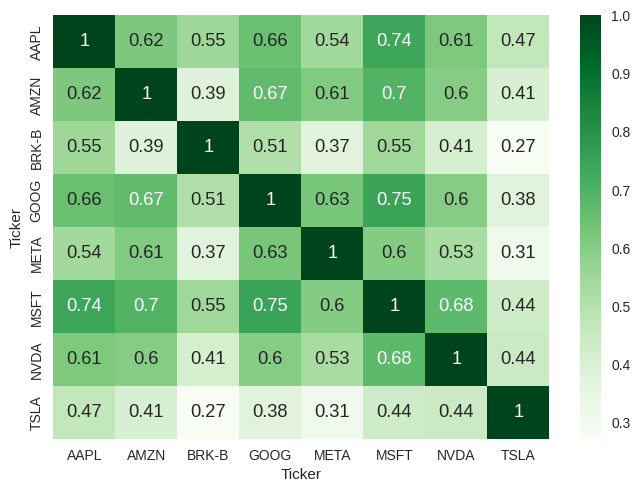

In [ ]:
sns.heatmap(log_returns.corr(), annot = True, cmap= "Greens")
plt.show()

**DEFINE THE WEIGHTS**

In [ ]:
portfolio_weights = n_assets * [1 / n_assets]
portfolio_weights

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

In [ ]:
# returns
portfolio_returns = pd.Series(np.dot(portfolio_weights, log_returns.T), index= log_returns.index)
portfolio_returns.head()

,0
Date,
2018-05-30,1.2431%
2018-05-31,-0.0586%
2018-06-01,1.7127%
2018-06-04,1.0597%
2018-06-05,0.1102%


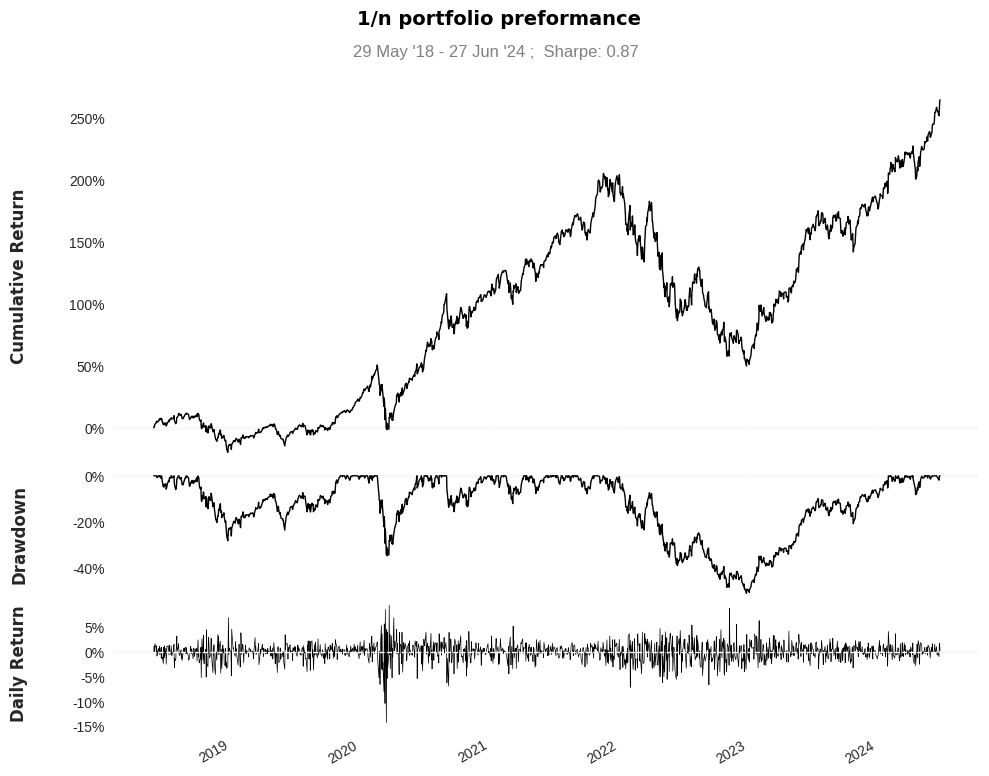

In [ ]:
qs.plots.snapshot(portfolio_returns, title = "1/n portfolio preformance", grayscale = True)


**PORTFOLIO EVALUATION METRICS**

In [ ]:
qs.reports.metrics(portfolio_returns, mode = "basic", prepare_returns= False)

                    Strategy
------------------  ----------
Start Period        2018-05-30
End Period          2024-06-27
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   264.56%
CAGR﹪              15.82%

Sharpe              0.87
Prob. Sharpe Ratio  98.29%
Sortino             1.22
Sortino/√2          0.86
Omega               1.17

Max Drawdown        -50.89%
Longest DD Days     802

Gain/Pain Ratio     0.17
Gain/Pain (1M)      0.93

Payoff Ratio        0.92
Profit Factor       1.17
Common Sense Ratio  1.06
CPC Index           0.6
Tail Ratio          0.91
Outlier Win Ratio   3.55
Outlier Loss Ratio  3.66

MTD                 9.06%
3M                  13.7%
6M                  27.35%
YTD                 28.18%
1Y                  44.82%
3Y (ann.)           8.36%
5Y (ann.)           19.57%
10Y (ann.)          15.82%
All-time (ann.)     15.82%

Avg. Drawdown       -3.74%
Avg. Drawdown Days  27
Recovery Factor     3.06
Ulcer Index         0.18
Serenity Index      0.

## **MONTECARLO SIMULATION**

In [ ]:
weights = np.random.random(n_assets)
weights /= np.sum(weights)
weights

array([0.02003631, 0.13803826, 0.05123456, 0.20708987, 0.1908235 ,
       0.14204163, 0.11859142, 0.13214444])

In [ ]:
weights.sum()

1.0

ANNUALIZED EXPECTED PORTFOLIO RETURN

In [ ]:
np.sum(log_returns.mean()*weights)*252

0.25442184133933915

In [ ]:
np.sum(log_returns.mean()*weights)*252

0.25442184133933915

ANNUALIZED EXPECTED PORTFOLIO VARIANCE

In [ ]:
np.dot(weights.T, np.dot(log_returns.cov()*252, weights))


0.09633491875233324

ANNUALIZED EXPECTED PORTFOLIO VOLATILITY

In [ ]:
math.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))

0.3103786699377605

**MONTECARLO SIMULATION TO GENERATE RANDOM PORTFOLIO**

In [ ]:
prets = []
pvols = []
for  p in range (1500):
     weights = np.random.random(n_assets)
     weights /= np.sum(weights)
     prets.append(np.sum(log_returns.mean()*weights)*252)
     pvols.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

## **EFFICIENT FRONTIER**

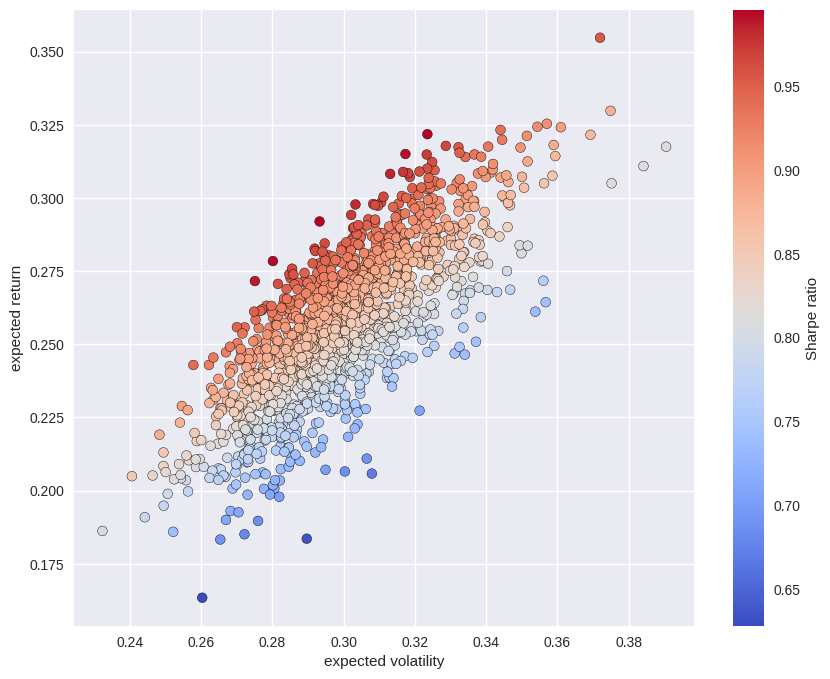

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o', cmap= 'coolwarm', edgecolors= "black")
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
sharpe_ratios_list = prets/pvols
print("Maximum Sharpe Ratio =", max(sharpe_ratios_list), "\nTotal Number of Portfolios =", len(sharpe_ratios_list))

Maximum Sharpe Ratio = 0.9956922430045486 
Total Number of Portfolios = 1500


In [ ]:
port=rp.Portfolio(returns=returns)

In [ ]:
method_mu='hist'
method_cov='hist'
hist= True
model='Classic'
rm='MV'
obj='Sharpe'
rf=0
l=0

In [ ]:
port.assets_stats(method_mu='hist', method_cov='hist')

In [ ]:
w_rp=port.rp_optimization(model="Classic", rm="MV", hist=True, rf=0, b=None)

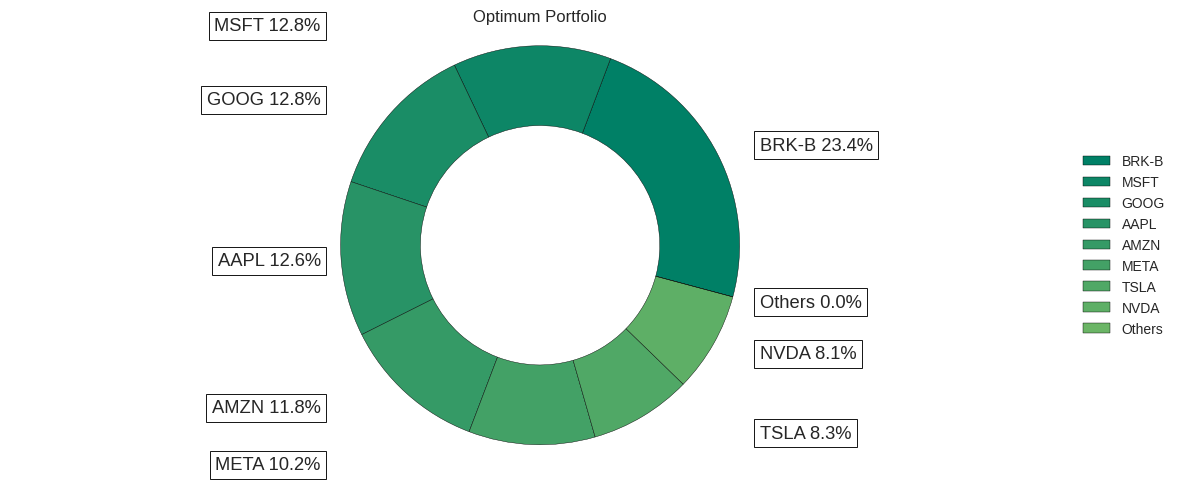

In [ ]:
ax=rp.plot_pie(w=w_rp, title="Optimum Portfolio", cmap='summer', height=5, width=12, ax=None)
plt.show()

In [ ]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AMZN,BRK-B,GOOG,META,MSFT,NVDA,TSLA
0,0.0000%,10.1566%,80.6113%,4.8219%,0.0000%,4.4101%,0.0000%,0.0000%
1,4.9163%,1.2578%,66.3034%,5.4911%,0.0000%,17.2492%,0.7783%,4.0039%
2,5.6085%,0.0000%,62.4268%,4.2898%,0.0000%,18.3360%,4.1908%,5.1481%
3,6.0496%,0.0000%,59.0438%,2.8818%,0.0000%,18.8548%,7.0658%,6.1042%
4,6.4354%,0.0000%,56.0902%,1.6543%,0.0000%,19.3098%,9.5726%,6.9377%


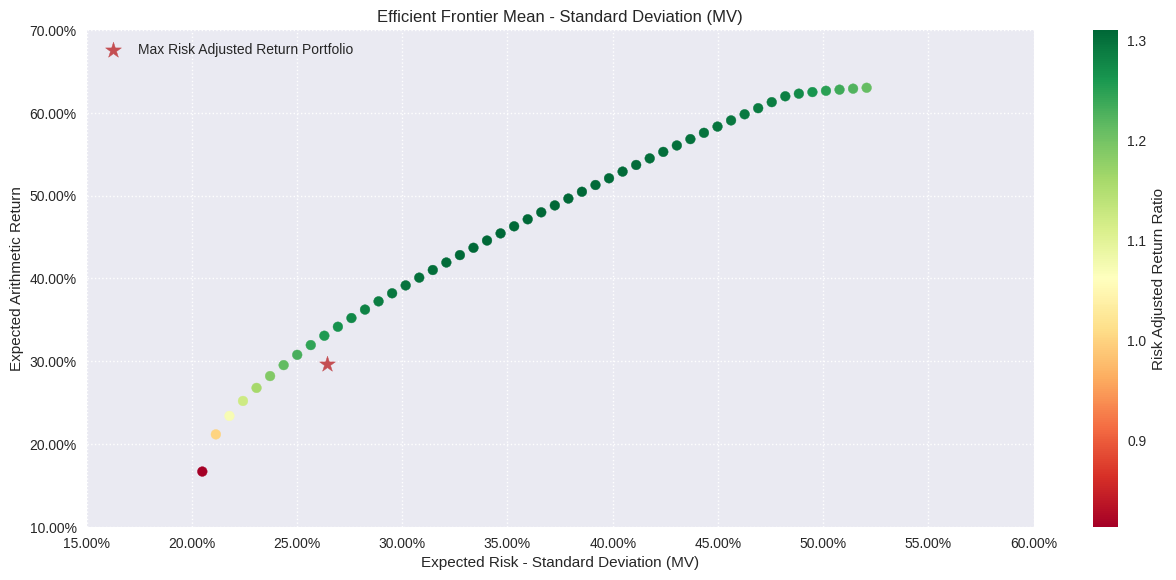

In [ ]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='RdYlGn', w=w_rp, label=label,
                      marker='*', s=12, c='r', height=6, width=13, ax=None)

In [ ]:
frontier

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AAPL,0.0000%,4.9163%,5.6085%,6.0496%,6.4354%,6.7827%,7.0310%,7.1862%,7.3344%,7.4742%,...,2.8707%,2.0495%,1.2037%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
AMZN,10.1566%,1.2578%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
BRK-B,80.6113%,66.3034%,62.4268%,59.0438%,56.0902%,53.4203%,50.7955%,48.1729%,45.6821%,43.3026%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
GOOG,4.8219%,5.4911%,4.2898%,2.8818%,1.6543%,0.5459%,0.0001%,0.0000%,0.0001%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
META,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
MSFT,4.4101%,17.2492%,18.3360%,18.8548%,19.3098%,19.7125%,19.8287%,19.6599%,19.5020%,19.3474%,...,3.8328%,2.3130%,0.8368%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
NVDA,0.0000%,0.7783%,4.1908%,7.0658%,9.5726%,11.8452%,13.9443%,15.9095%,17.7735%,19.5582%,...,67.1180%,68.8895%,70.6631%,73.9833%,81.9259%,86.8475%,90.7815%,94.1742%,97.2136%,100.0000%
TSLA,0.0000%,4.0039%,5.1481%,6.1042%,6.9377%,7.6935%,8.4004%,9.0715%,9.7079%,10.3175%,...,26.1784%,26.7480%,27.2964%,26.0167%,18.0741%,13.1525%,9.2185%,5.8258%,2.7864%,0.0000%


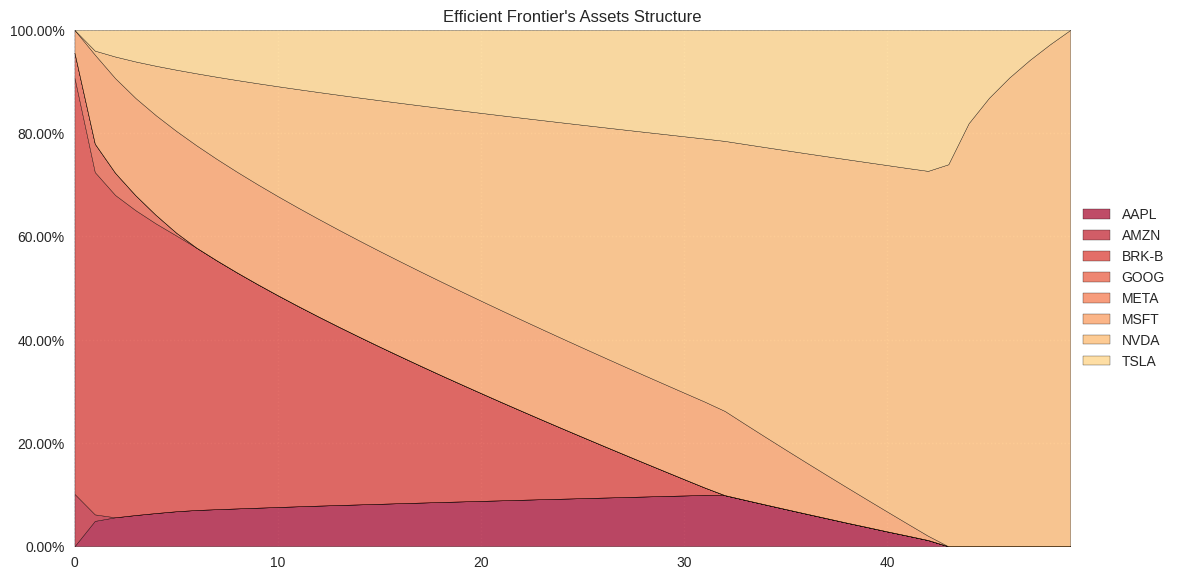

In [ ]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="RdYlGn", height=6, width=12, ax=None)

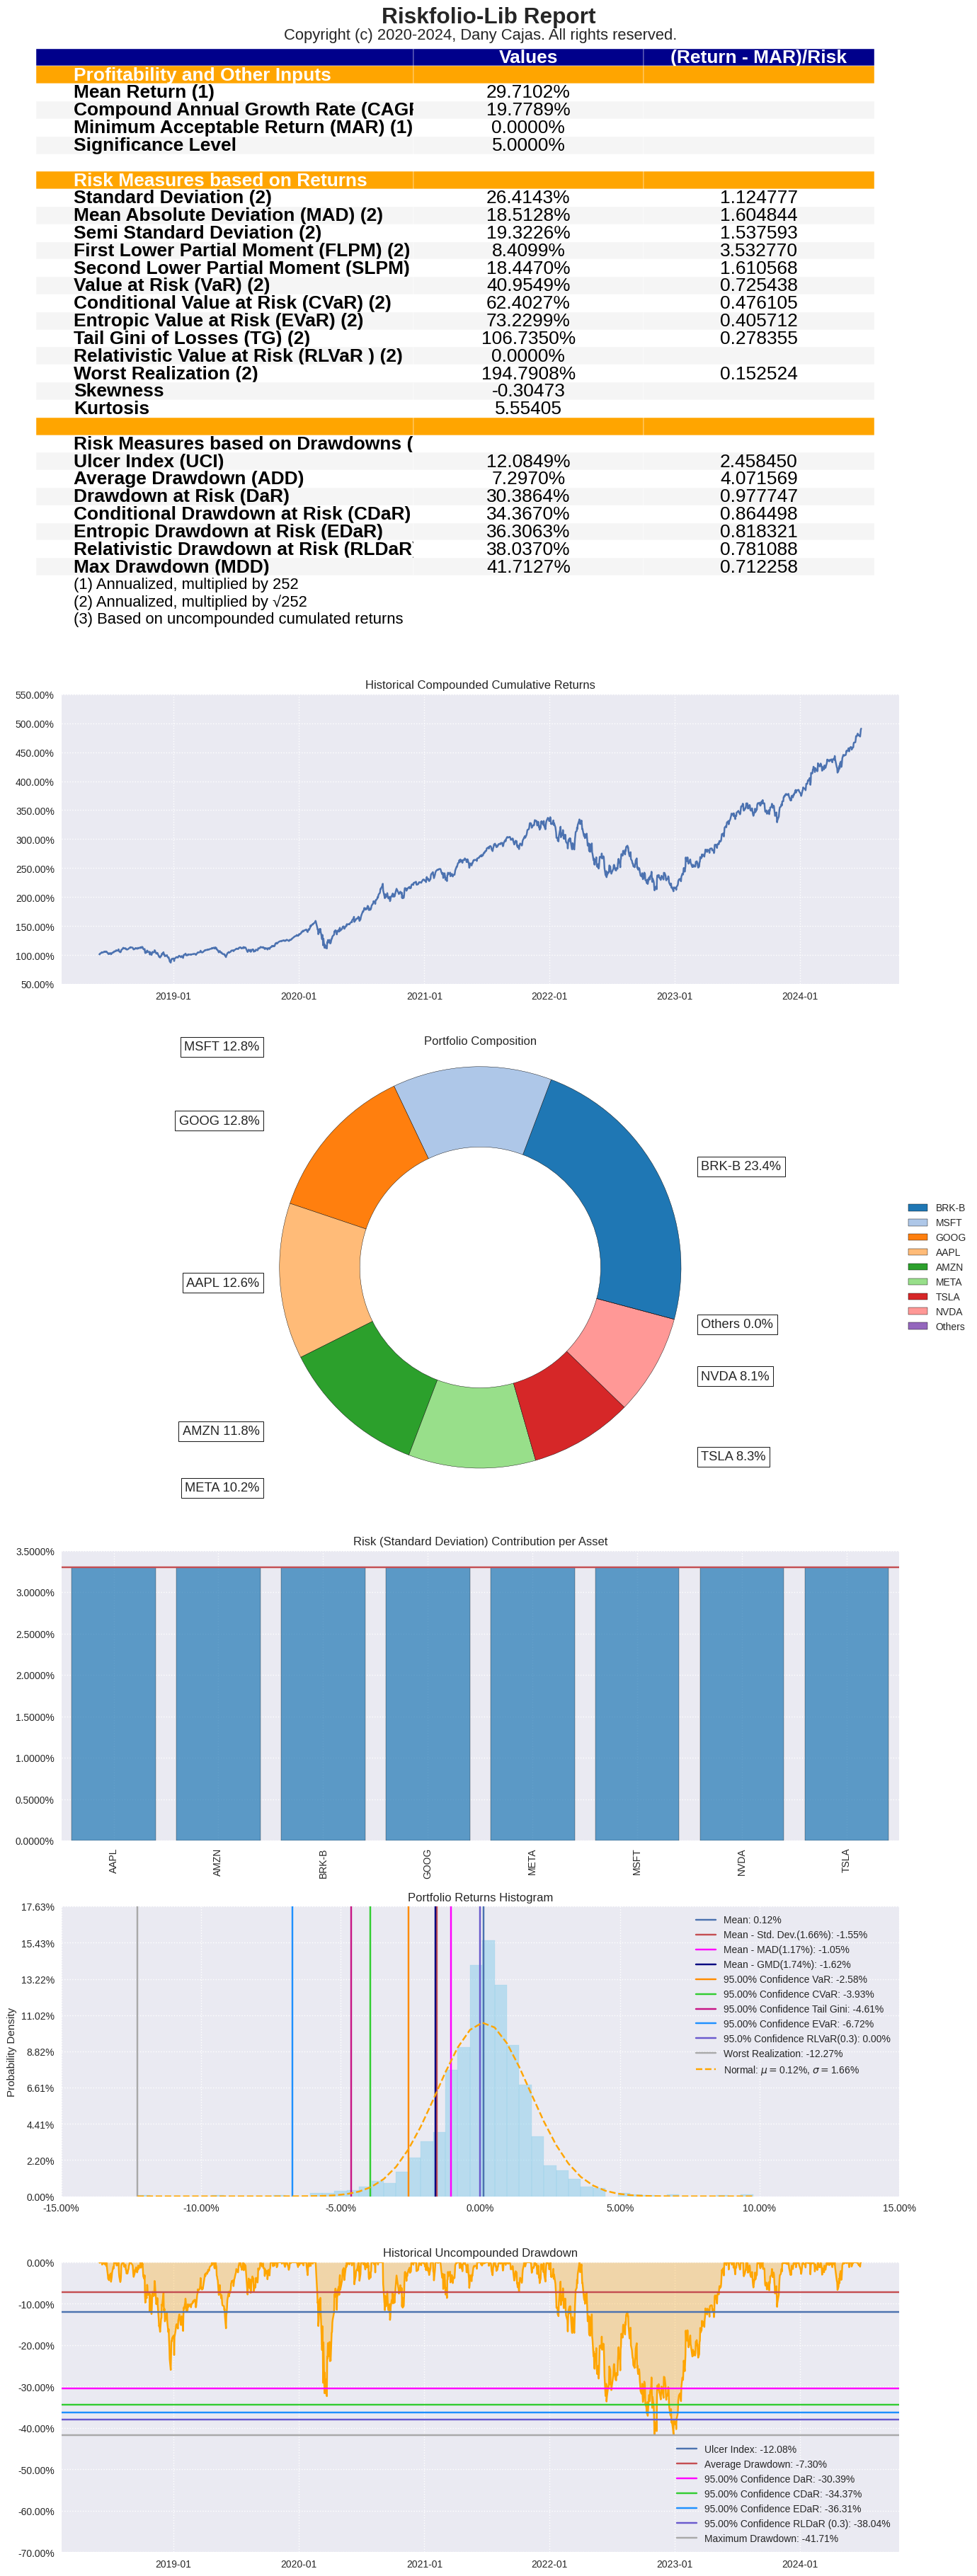

In [ ]:
ax=rp.jupyter_report(returns, w_rp, rm=rm, rf=0, alpha=0.05, height=6, width=14, nrow=25)
plt.show()

## CALCULATING THE PORTFOLIO THAT MAXIMIZES **MEAN/CVaR** RATIO

In [ ]:
#rm:Risk measure
rm='CVaR'
alpha=0.05
w_rp=port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w_rp)

,weights
AAPL,0.0000%
AMZN,0.0000%
BRK-B,2.5839%
GOOG,0.0000%
META,0.0000%
MSFT,11.7176%
NVDA,66.1178%
TSLA,19.5808%


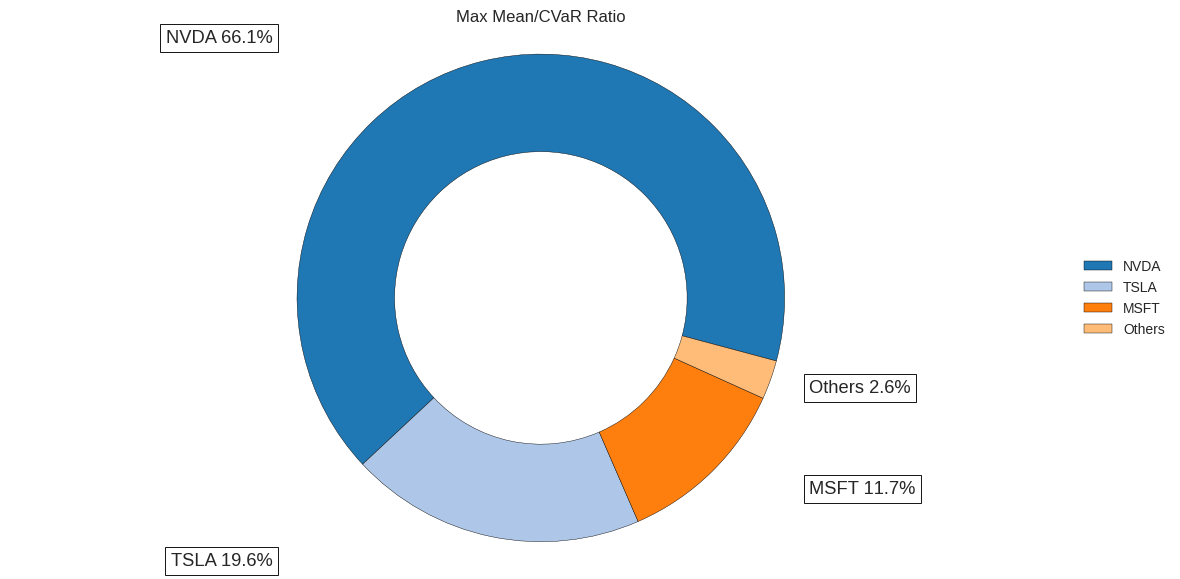

In [ ]:
ax=rp.plot_pie(w=w_rp, title='Max Mean/CVaR Ratio', others= 0.05, nrow=25, cmap="tab20", height=6, width=12, ax=None)

In [ ]:
points=50
frontier=port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
display(frontier.T.head())

,AAPL,AMZN,BRK-B,GOOG,META,MSFT,NVDA,TSLA
0,0.0000%,0.5615%,85.6663%,1.8546%,0.0000%,11.9175%,0.0000%,0.0000%
1,0.0000%,0.0000%,72.2168%,0.0000%,0.0000%,24.2806%,0.7998%,2.7027%
2,0.0000%,0.0000%,69.0780%,0.0000%,0.0000%,23.2269%,5.6404%,2.0548%
3,0.0000%,0.0000%,63.6786%,0.0000%,0.0000%,26.0001%,5.9812%,4.3401%
4,0.0000%,0.0000%,60.5431%,0.0000%,0.0000%,25.7015%,6.6431%,7.1124%


## **PLOTTING FRONTIER**

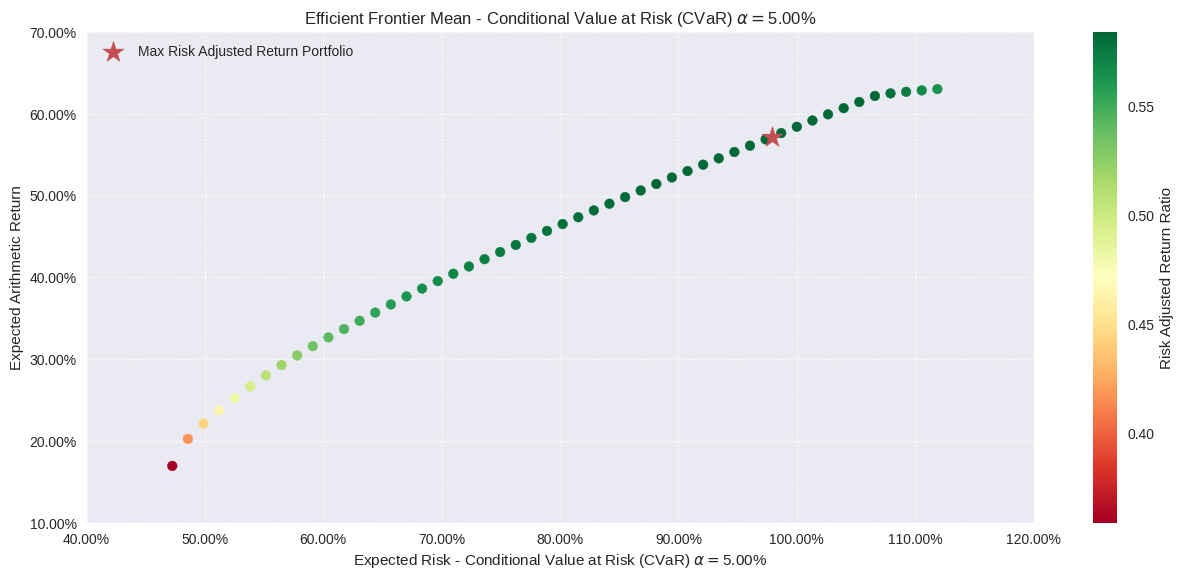

In [ ]:
label='Max Risk Adjusted Return Portfolio'
ax=rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=alpha, cmap='RdYlGn', w=w_rp, label=label, marker='*', s=16, c='r', height=6, width=13, ax=None)

EFFICIENT FRONTIER COMPOSITION

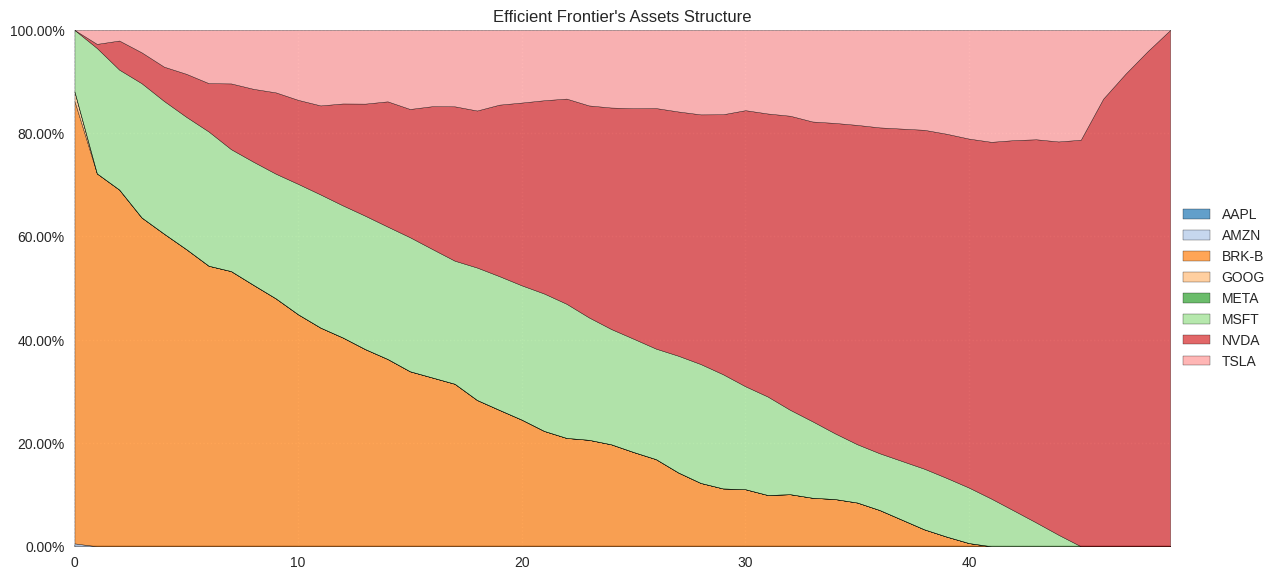

In [ ]:
ax=rp.plot_frontier_area(w_frontier=frontier, cmap='tab20', height=6, width=13, ax=None)

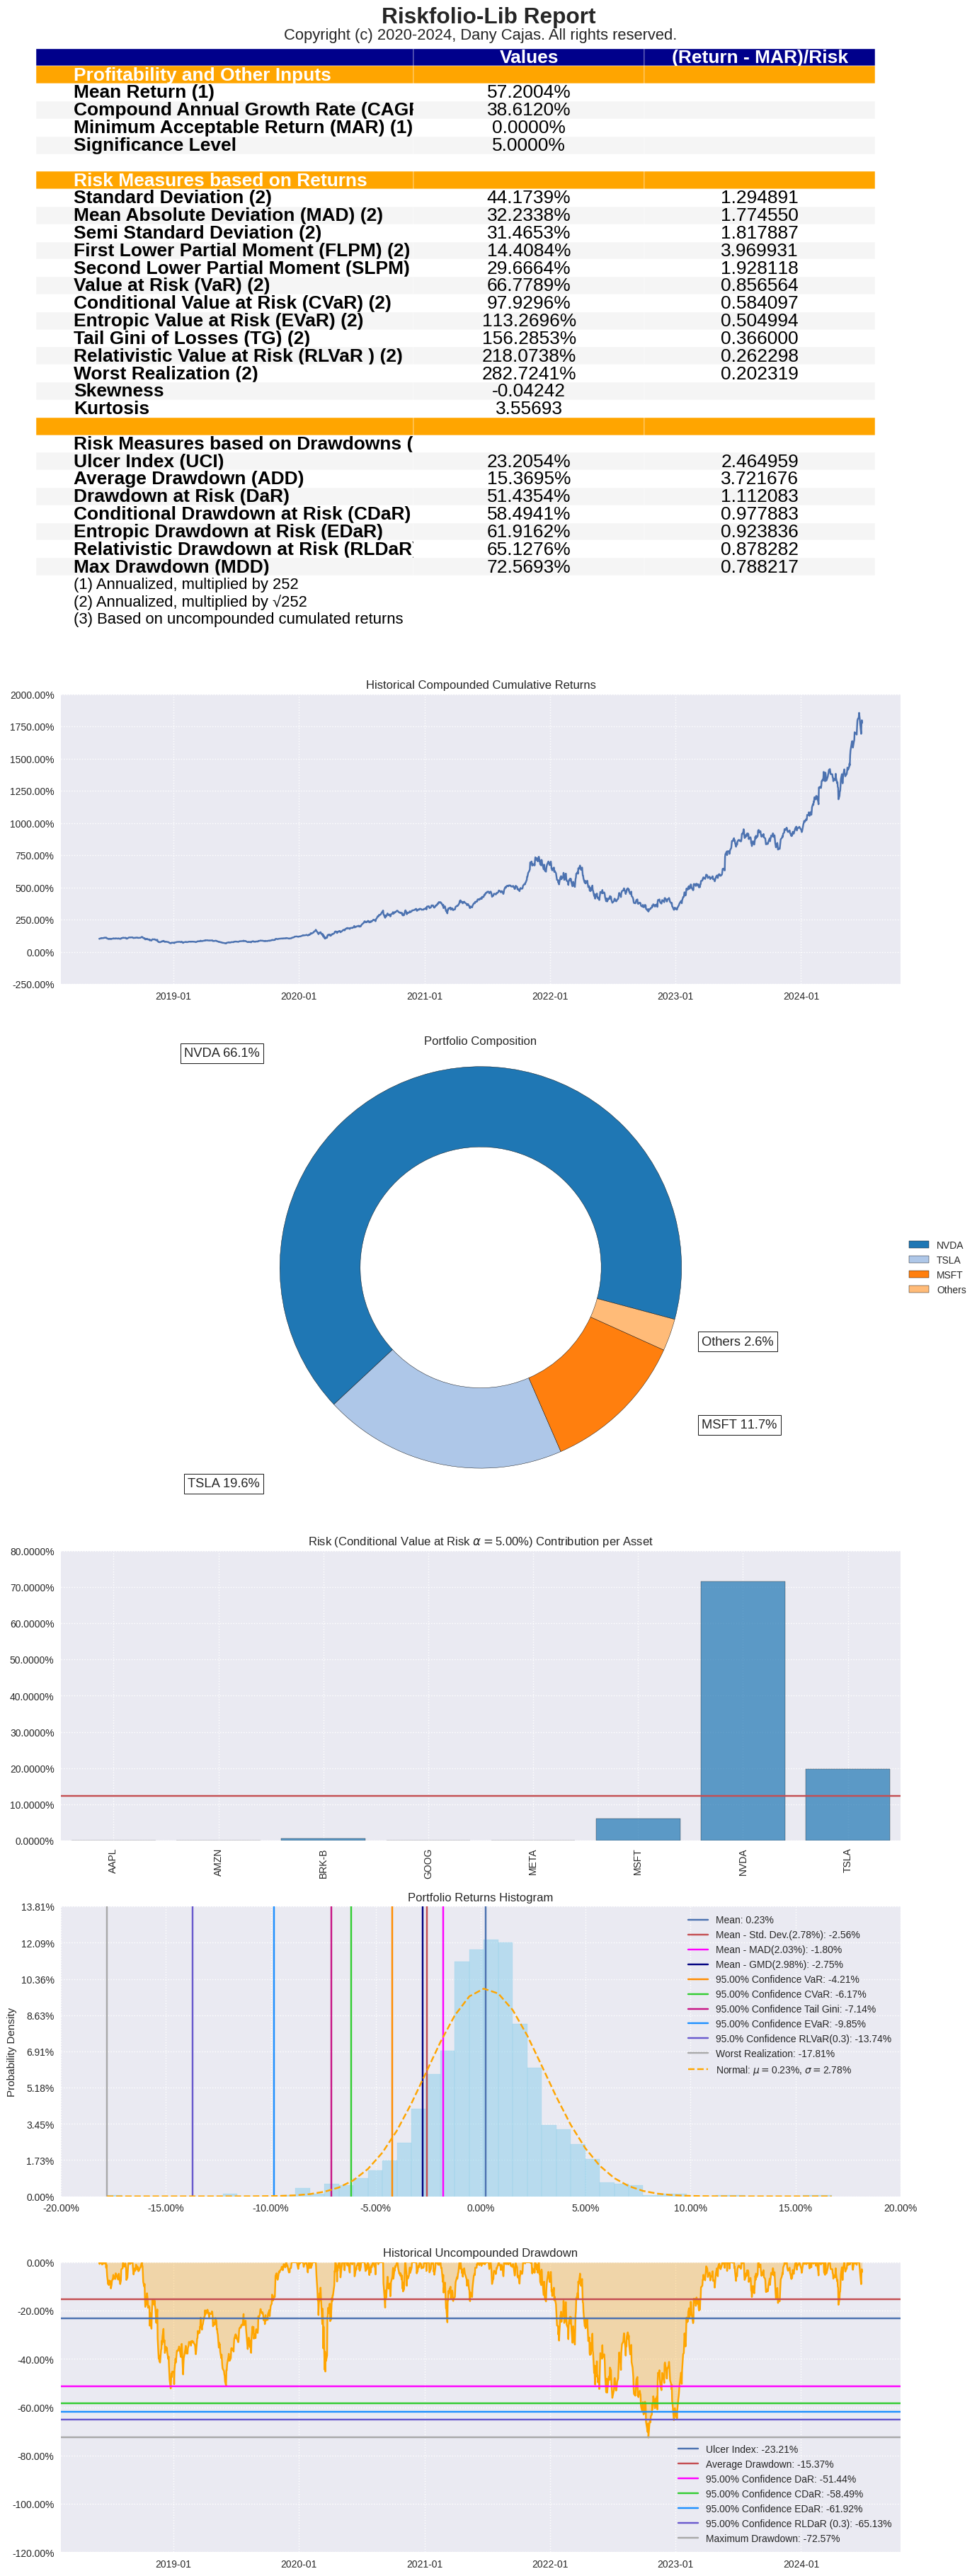

In [ ]:
ax=rp.jupyter_report(returns, w_rp, rm=rm, rf=0, alpha=0.05, height=6, width=14, nrow=25)
plt.show()